In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [5]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

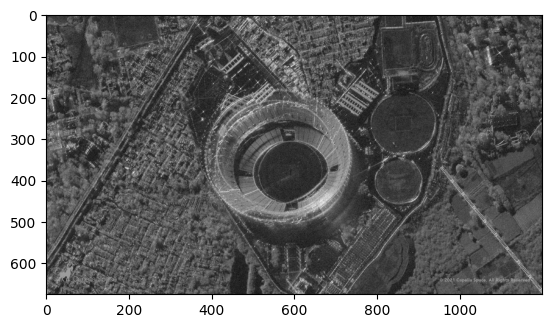

In [6]:
plt.imshow(image_gray, cmap="gray")

In [7]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]],
      shape=(675, 1200), dtype=uint8)

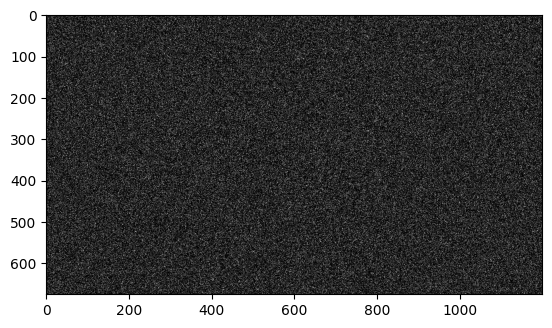

In [8]:
plt.imshow(noise_gauss, cmap="gray")

In [9]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [10]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [11]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

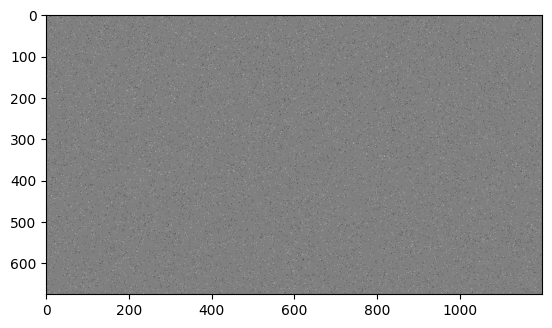

In [12]:
plt.imshow(bg_image, cmap="gray")

In [13]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

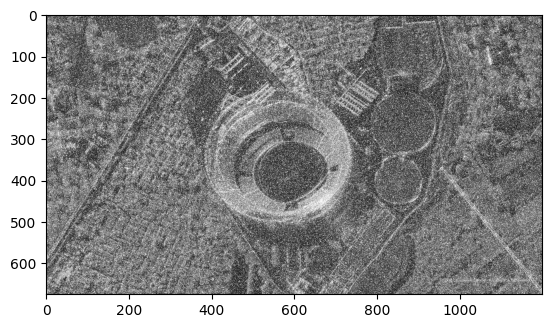

In [14]:
plt.imshow(image_noise_gauss, cmap="gray")

In [15]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [16]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [17]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [18]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


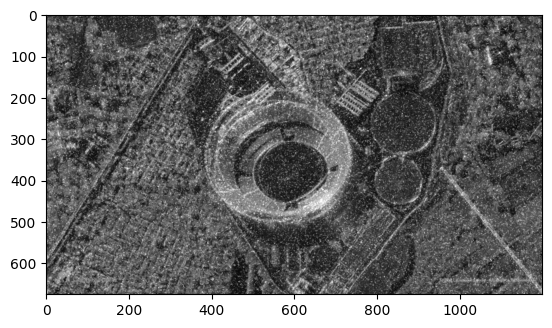

In [19]:
plt.imshow(image_gauss_median, cmap="gray")

In [20]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

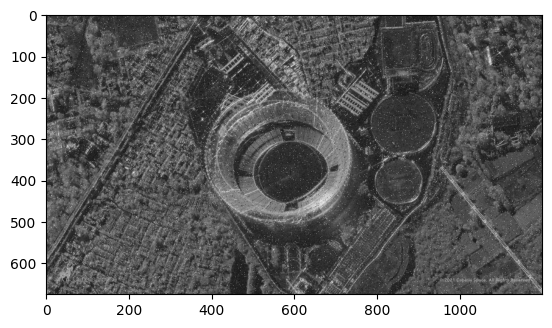

In [21]:
plt.imshow(image_sp, cmap="gray")

In [22]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

387.2643716049383 0.7207397005665783


In [23]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [24]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.85122716049382 0.8161461654612262


# Другие типы фильтров

In [25]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [26]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [27]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [28]:
import math

def geom(a):
    prod = 1.0
    for i in range(a.shape[0]):
        prod1 = 1.0
        for j in range(a.shape[1]):
            # Используем логарифмы для избежания переполнения
            prod1 *= max(a[i,j], 1e-10)  # Избегаем нулей
        # Геометрическое среднее
        prod1 = math.pow(prod1, 1.0/(a.shape[0]*a.shape[1]))
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


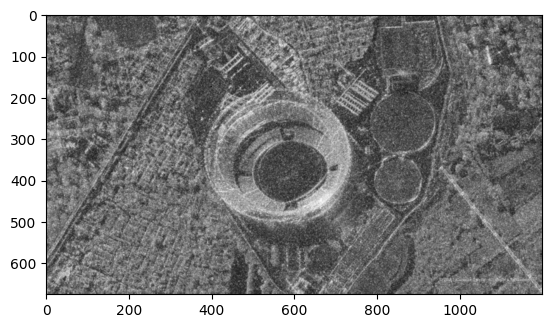

In [29]:
plt.imshow(res, cmap="gray")

In [30]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

1220.771425925926 0.3995977775912718



# 2D свертка

In [31]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [32]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [33]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [34]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

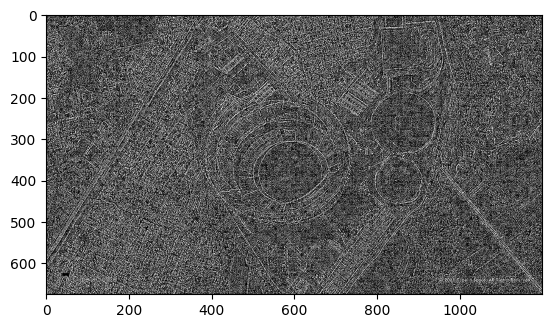

In [35]:
plt.imshow(image_lapl, cmap="gray")

In [36]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

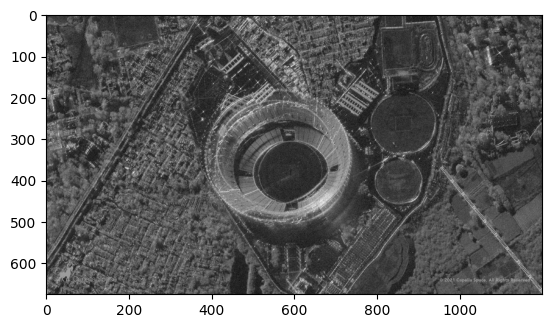

In [37]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")

(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

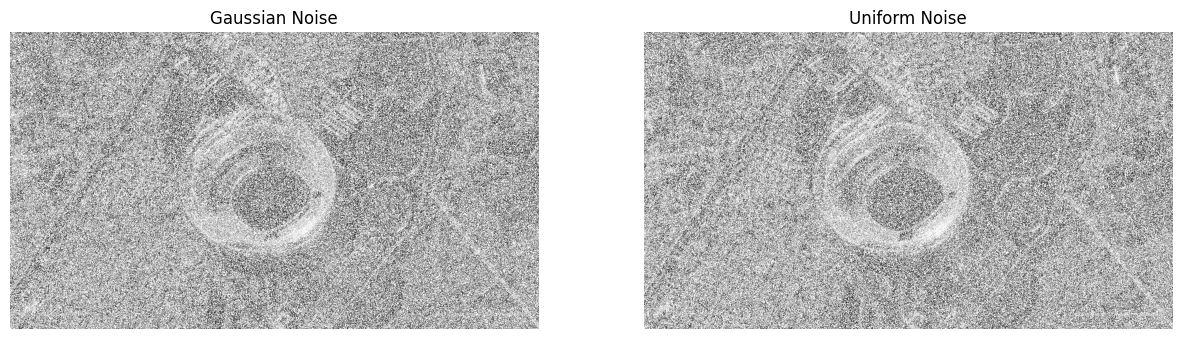

In [41]:
mean = 0
stddev = 25

noise_gauss = np.random.normal(mean, stddev, image_gray.shape).astype(np.uint8)
image_noise_gauss = cv2.add(image_gray, noise_gauss)

noise_uniform = np.random.uniform(-50, 50, image_gray.shape).astype(np.uint8)
image_noise_uniform = cv2.add(image_gray, noise_uniform)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title('Gaussian Noise')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(image_noise_uniform, cmap="gray")
plt.title('Uniform Noise')
plt.axis('off')

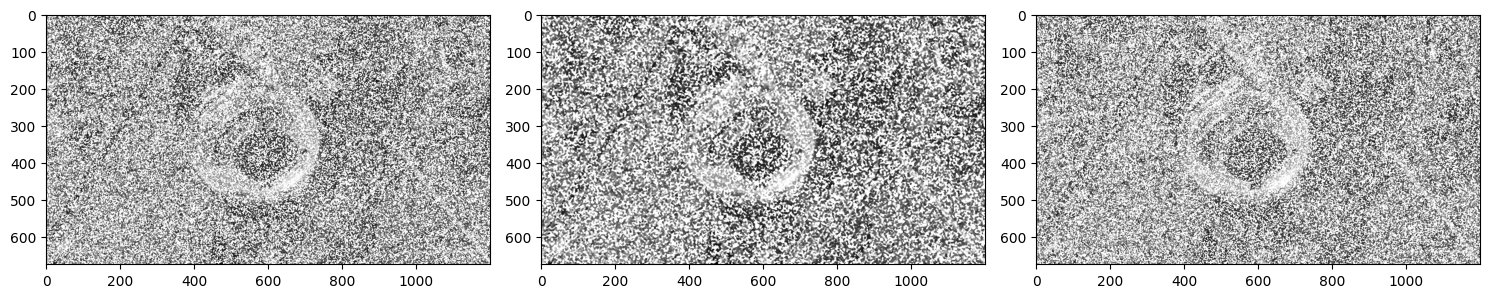

In [46]:
image_gauss_median_3 = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median_5 = cv2.medianBlur(image_noise_gauss, 5)

image_uniform_median_3 = cv2.medianBlur(image_noise_uniform, 3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gauss_median_3, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(image_gauss_median_5, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(image_uniform_median_3, cmap="gray")

plt.tight_layout()

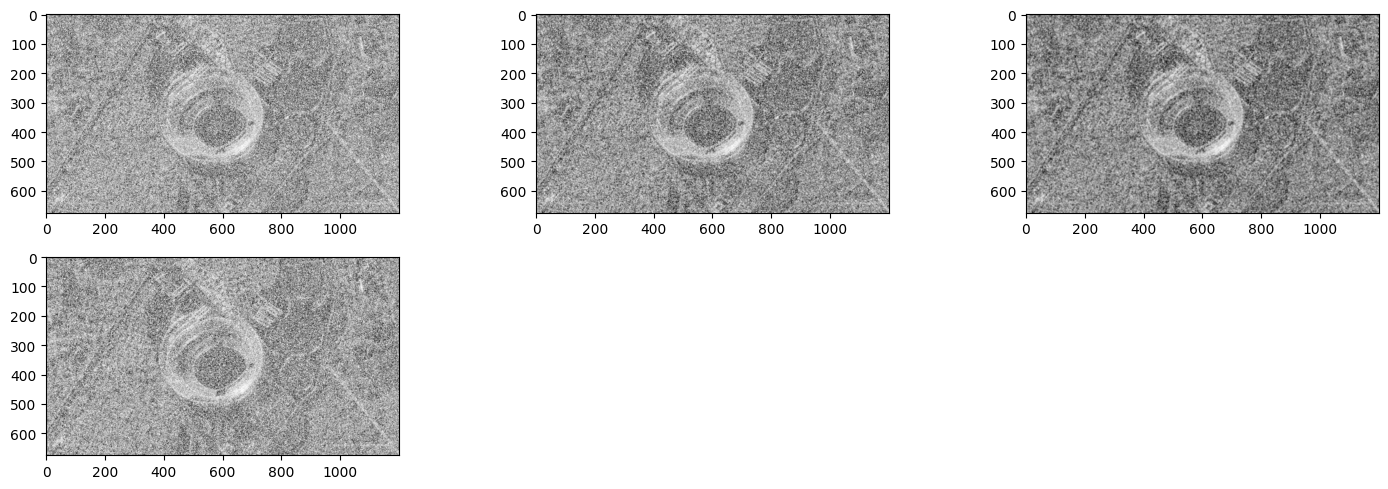

In [47]:
image_gauss_gauss_3 = cv2.GaussianBlur(image_noise_gauss, (3, 3), 0)
image_gauss_gauss_5 = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
image_gauss_gauss_7 = cv2.GaussianBlur(image_noise_gauss, (7, 7), 0)

image_uniform_gauss_3 = cv2.GaussianBlur(image_noise_uniform, (3, 3), 0)

plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.imshow(image_gauss_gauss_3, cmap="gray")

plt.subplot(2, 3, 2)
plt.imshow(image_gauss_gauss_5, cmap="gray")

plt.subplot(2, 3, 3)
plt.imshow(image_gauss_gauss_7, cmap="gray")

plt.subplot(2, 3, 4)
plt.imshow(image_uniform_gauss_3, cmap="gray")

plt.tight_layout()

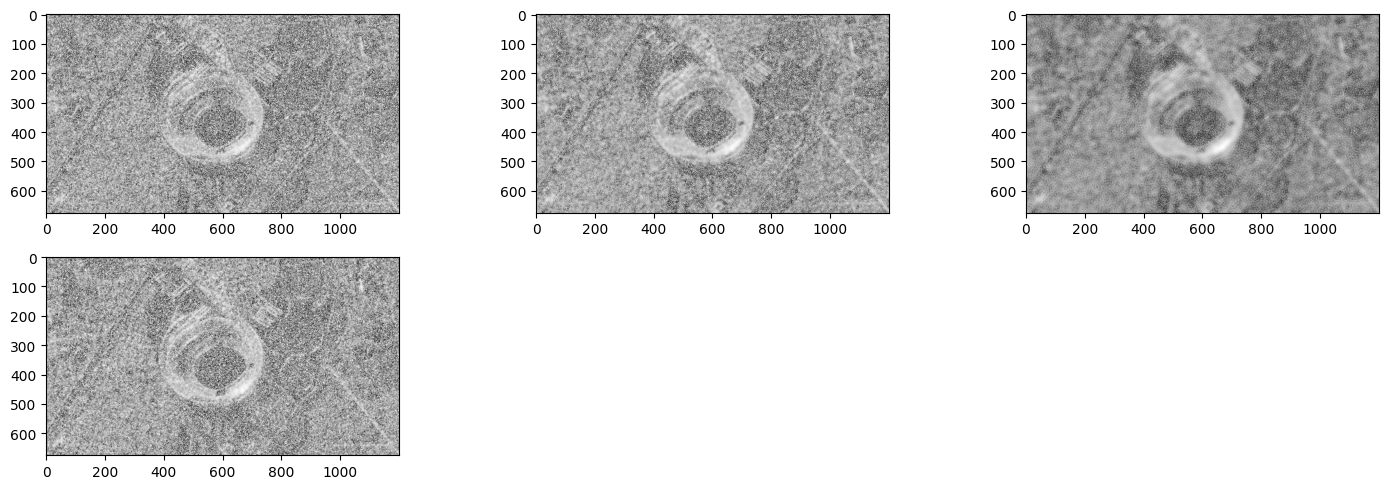

In [48]:
image_gauss_bilat_9 = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
image_gauss_bilat_15 = cv2.bilateralFilter(image_noise_gauss, 15, 100, 100)
image_gauss_bilat_25 = cv2.bilateralFilter(image_noise_gauss, 25, 150, 150)

image_uniform_bilat_9 = cv2.bilateralFilter(image_noise_uniform, 9, 75, 75)

plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.imshow(image_gauss_bilat_9, cmap="gray")

plt.subplot(2, 3, 2)
plt.imshow(image_gauss_bilat_15, cmap="gray")

plt.subplot(2, 3, 3)
plt.imshow(image_gauss_bilat_25, cmap="gray")

plt.subplot(2, 3, 4)
plt.imshow(image_uniform_bilat_9, cmap="gray")

plt.tight_layout()

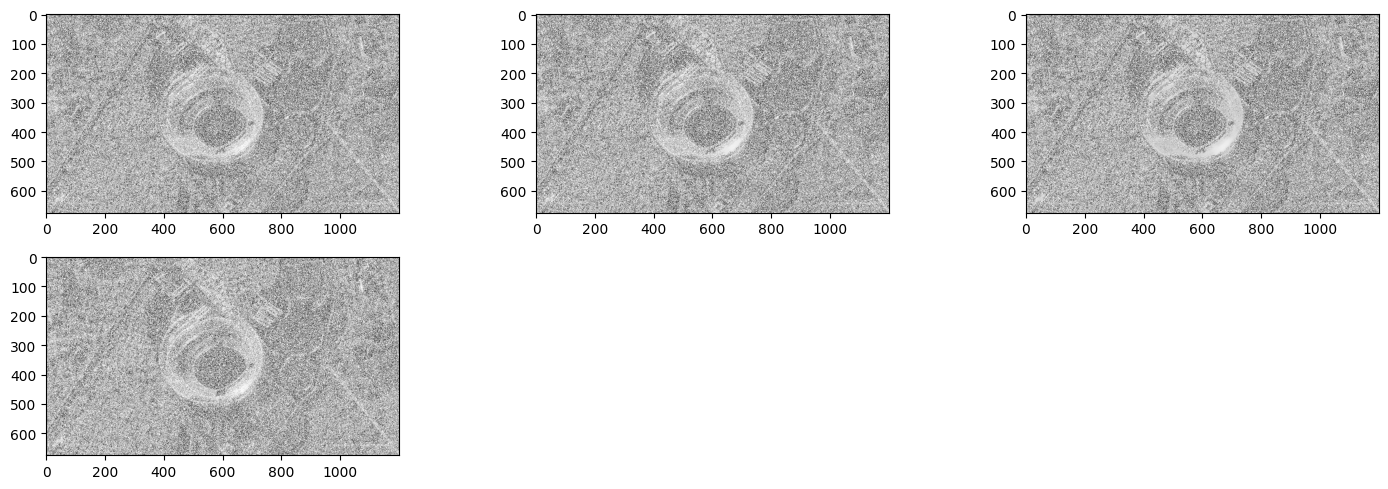

In [49]:
image_gauss_nlm_10 = cv2.fastNlMeansDenoising(image_noise_gauss, h=10)
image_gauss_nlm_20 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
image_gauss_nlm_30 = cv2.fastNlMeansDenoising(image_noise_gauss, h=30)

image_uniform_nlm_10 = cv2.fastNlMeansDenoising(image_noise_uniform, h=10)

plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.imshow(image_gauss_nlm_10, cmap="gray")

plt.subplot(2, 3, 2)
plt.imshow(image_gauss_nlm_20, cmap="gray")

plt.subplot(2, 3, 3)
plt.imshow(image_gauss_nlm_30, cmap="gray")

plt.subplot(2, 3, 4)
plt.imshow(image_uniform_nlm_10, cmap="gray")

plt.tight_layout()

In [50]:
def calculate_metrics(original, filtered, filter_name):
    mse = mean_squared_error(original, filtered)
    ssim = structural_similarity(original, filtered)
    return {'filter': filter_name, 'mse': mse, 'ssim': ssim}

results_gauss = []
results_gauss.append(calculate_metrics(image_gray, image_noise_gauss, "Noisy Image (Gauss)"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_median_3, "Median 3x3"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_median_5, "Median 5x5"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_gauss_3, "Gaussian 3x3"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_gauss_5, "Gaussian 5x5"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_gauss_7, "Gaussian 7x7"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_bilat_9, "Bilateral d=9"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_bilat_15, "Bilateral d=15"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_bilat_25, "Bilateral d=25"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_nlm_10, "NLM h=10"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_nlm_20, "NLM h=20"))
results_gauss.append(calculate_metrics(image_gray, image_gauss_nlm_30, "NLM h=30"))

In [56]:
print("              Резултаты для Гауссова шума")
print("Фильтр\t\t\tMSE\t\tSSIM")
for result in results_gauss:
    print(f"{result['filter']:20}\t{result['mse']:.2f}\t\t{result['ssim']:.4f}")

              Резултаты для Гауссова шума
Фильтр			MSE		SSIM
Noisy Image (Gauss) 	15854.36		0.0552
Median 3x3          	15621.33		0.0540
Median 5x5          	15325.72		0.0546
Gaussian 3x3        	10287.72		0.1745
Gaussian 5x5        	9889.44		0.2128
Gaussian 7x7        	9706.12		0.2380
Bilateral d=9       	13772.04		0.0699
Bilateral d=15      	11853.69		0.0911
Bilateral d=25      	10296.05		0.1260
NLM h=10            	15854.34		0.0552
NLM h=20            	15853.20		0.0554
NLM h=30            	15789.07		0.0579


In [59]:
results_uniform = []

results_uniform.append(calculate_metrics(image_gray, image_noise_uniform, "Noisy Image (Unifrom)"))
results_uniform.append(calculate_metrics(image_gray, image_uniform_median_3, "Median 3x3"))
results_uniform.append(calculate_metrics(image_gray, image_uniform_gauss_3, "Gaussian 3x3"))
results_uniform.append(calculate_metrics(image_gray, image_uniform_bilat_9, "Bilateral d=9"))
results_uniform.append(calculate_metrics(image_gray, image_uniform_nlm_10, "NLM h=10"))

In [60]:
print("              Резултаты для Постоянного шума")
print("Фильтр\t\t\tMSE\t\tSSIM")
for result in results_uniform:
    print(f"{result['filter']:20}\t{result['mse']:.2f}\t\t{result['ssim']:.4f}")

              Резултаты для Постоянного шума
Фильтр			MSE		SSIM
Noisy Image (Unifrom)	16154.08		0.0572
Median 3x3          	16285.90		0.0550
Gaussian 3x3        	10938.13		0.1772
Bilateral d=9       	14051.14		0.0757
NLM h=10            	16154.03		0.0573
